## Exploratory Data Analisys
### Topic (**Inflation**) according to news portal

### Load
Data

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
data = pickle.load(open('data/df_clean_izq.pkl','rb'))

In [3]:
inf_izq = data.loc[data.topics == 'inflation']
inf_izq.shape

(34, 7)

In [4]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [5]:
inf_der = data.loc[data.topics == 'inflation']
inf_der.shape

(33, 7)

Tokens

In [6]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq_new.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der_new.pkl')

In [7]:
tokens_izq_inf = tokens_izq[tokens_izq.topics == 'inflation'].drop('topics', axis=1)

In [8]:
tokens_der_inf = tokens_der[tokens_der.topics == 'inflation'].drop('topics', axis=1)

### Versus

#### Length
How many words?

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unidecode

In [10]:
stopwords_sp = stopwords.words('spanish')

In [11]:
def tokenizer(texto):

    alphanumeric = re.sub(r'([^\s\w]|_)+', '', texto).lower()
    no_accents = unidecode.unidecode(alphanumeric)
    
    tockens = word_tokenize(no_accents)
    
    tockens_clean = [tocken for tocken in tockens if tocken not in stopwords_sp and tocken.isalpha()]
    
    terminos = tockens_clean

    return terminos

In [12]:
words_izq = [tokenizer(documento) for documento in inf_izq.body.values]
words_der = [tokenizer(documento) for documento in inf_der.body.values]

In [13]:
for i, (izq, der, i_date, d_date) in enumerate(zip(words_izq, words_der, inf_izq.date, inf_der.date)):
    print(f'{i} docs.:{i_date}  VS {d_date}')
    print(f'{len(izq)} words\tVS\t{len(der)} words')
    print('------')

0 docs.:
Lunes 23 de noviembre  VS 29/11/2020
91 words	VS	256 words
------
1 docs.:
Lunes 23 de noviembre  VS 12/11/2020
211 words	VS	249 words
------
2 docs.:
Lunes 23 de noviembre  VS 11/11/2020
215 words	VS	251 words
------
3 docs.:
Viernes 20 de noviembre  VS 09/11/2020
418 words	VS	291 words
------
4 docs.:
Jueves 19 de noviembre  VS 02/11/2020
142 words	VS	402 words
------
5 docs.:
Martes 17 de noviembre  VS 24/10/2020
147 words	VS	319 words
------
6 docs.:
Viernes 13 de noviembre  VS 23/10/2020
159 words	VS	364 words
------
7 docs.:
Jueves 12 de noviembre  VS 15/10/2020
135 words	VS	293 words
------
8 docs.:
Miércoles 21 de octubre  VS 14/10/2020
119 words	VS	297 words
------
9 docs.:
Martes 20 de octubre  VS 12/10/2020
199 words	VS	377 words
------
10 docs.:
Martes 13 de octubre  VS 16/09/2020
172 words	VS	268 words
------
11 docs.:
Miércoles 30 de septiembre  VS 11/09/2020
191 words	VS	337 words
------
12 docs.:
Viernes 25 de septiembre  VS 01/09/2020
131 words	VS	781 words
--

#### Lexicon
How many unique words?

In [14]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {len(set(izq))} words VS {len(set(der))} words')

Collected doc. 0: 82 words VS 188 words
Collected doc. 1: 171 words VS 189 words
Collected doc. 2: 170 words VS 207 words
Collected doc. 3: 285 words VS 211 words
Collected doc. 4: 94 words VS 309 words
Collected doc. 5: 113 words VS 253 words
Collected doc. 6: 125 words VS 275 words
Collected doc. 7: 119 words VS 205 words
Collected doc. 8: 95 words VS 208 words
Collected doc. 9: 155 words VS 260 words
Collected doc. 10: 134 words VS 183 words
Collected doc. 11: 159 words VS 246 words
Collected doc. 12: 117 words VS 529 words
Collected doc. 13: 151 words VS 283 words
Collected doc. 14: 83 words VS 281 words
Collected doc. 15: 114 words VS 273 words
Collected doc. 16: 149 words VS 320 words
Collected doc. 17: 111 words VS 218 words
Collected doc. 18: 90 words VS 4 words
Collected doc. 19: 118 words VS 221 words
Collected doc. 20: 224 words VS 230 words
Collected doc. 21: 231 words VS 211 words
Collected doc. 22: 97 words VS 240 words
Collected doc. 23: 119 words VS 165 words
Collected 

#### Ratio
Unique words per words

In [15]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {round(len(set(izq)) / len(izq),2)} words VS {round(len(set(der)) / len(der),2)} words')

Collected doc. 0: 0.9 words VS 0.73 words
Collected doc. 1: 0.81 words VS 0.76 words
Collected doc. 2: 0.79 words VS 0.82 words
Collected doc. 3: 0.68 words VS 0.73 words
Collected doc. 4: 0.66 words VS 0.77 words
Collected doc. 5: 0.77 words VS 0.79 words
Collected doc. 6: 0.79 words VS 0.76 words
Collected doc. 7: 0.88 words VS 0.7 words
Collected doc. 8: 0.8 words VS 0.7 words
Collected doc. 9: 0.78 words VS 0.69 words
Collected doc. 10: 0.78 words VS 0.68 words
Collected doc. 11: 0.83 words VS 0.73 words
Collected doc. 12: 0.89 words VS 0.68 words
Collected doc. 13: 0.89 words VS 0.8 words
Collected doc. 14: 0.9 words VS 0.66 words
Collected doc. 15: 0.75 words VS 0.76 words
Collected doc. 16: 0.87 words VS 0.72 words
Collected doc. 17: 0.71 words VS 0.74 words
Collected doc. 18: 0.78 words VS 1.0 words
Collected doc. 19: 0.76 words VS 0.76 words
Collected doc. 20: 0.73 words VS 0.81 words
Collected doc. 21: 0.77 words VS 0.74 words
Collected doc. 22: 0.86 words VS 0.78 words
Colle

### Clouds
Word count per corpus

In [16]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [17]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [18]:
top_words_izq = count_words(tokens_izq_inf)

In [19]:
words_izq = [word for docs, w_counts in top_words_izq.items() for word in list(word for word, num in w_counts)]

In [20]:
top_words_der = count_words(tokens_der_inf)

In [21]:
words_der = [word for docs, w_counts in top_words_der.items() for word in list(word for word, num in w_counts)]

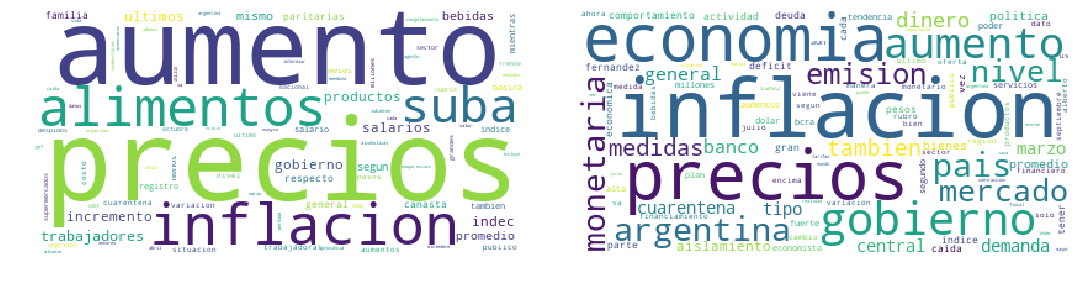

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

for words, ax in zip([words_izq, words_der], axes.flatten()):
    cloud.generate_from_frequencies(dict(Counter(words).most_common()))
    ax.imshow(cloud)
    ax.axis('off')
    
plt.show()

#### TfIDf
TfIDf score count per corpus

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
tfidf_izq = TfidfTransformer().fit_transform(tokens_izq_inf)
tfidf_der = TfidfTransformer().fit_transform(tokens_der_inf)

In [25]:
tfidf_izq_df = pd.DataFrame(tfidf_izq.todense(), columns = tokens_izq_inf.columns)
tfidf_der_df = pd.DataFrame(tfidf_der.todense(), columns = tokens_der_inf.columns)

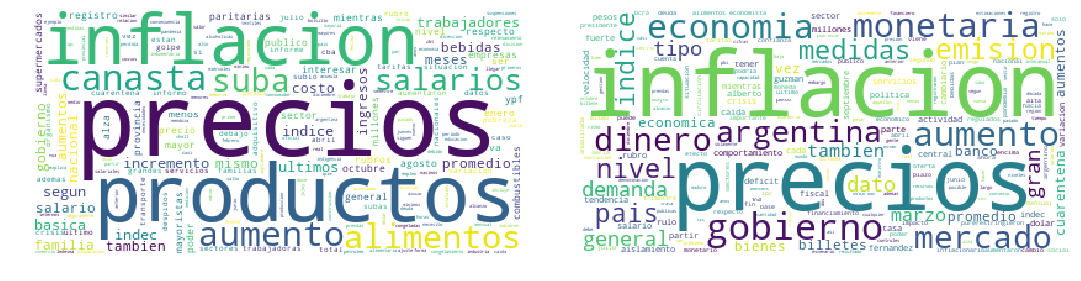

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

for df, ax in zip([tfidf_izq_df, tfidf_der_df], axes.flatten()):
    cloud.generate_from_frequencies(df.sum(axis=0).sort_values())
    ax.imshow(cloud)
    ax.axis('off')
    
plt.show()

Observation
    
At first glance, it is clear that each news portal focuses on distintc themes around the same subject. Words like "productos", "salarios", "canasta" are absent in "derecha diario", while "dinero", "mercado", "monetaria" do not appear in "izquierda diario" corpus.

According to this exploratory analisys, it is not so counter-intuitive to infer that one gives more relevance to the efect of inflation over the prices of goods and wages, while the other seems to be more interested in giving a reason to the subject matter from a monetarist point of view.